In [1]:
#importing necessary libraries for EDA
import pandas as pd
import numpy as np
import regex as re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import plotly
import plotly.express as px
from pandas.plotting import scatter_matrix

# core libraries to collect the data
# importing requests, along with library
import requests
from bs4 import BeautifulSoup

### step - 3 : Data Cleaning

In [2]:
startup = pd.read_csv(r"C:\Users\sathw\batch 261\ambition box webscrapping project\Ambitionbox.csv")
startup

Unnamed: 0              companies              industry  \
0              0                  Udaan                np.nan   
1              1              Oyo Rooms           Hospitality   
2              2                 Swiggy              Internet   
3              3                 CARS24              Internet   
4              4            Whitehat jr                EdTech   
...          ...                    ...                   ...   
1595        1595           Welcome Cure            Healthcare   
1596        1596  Plancess EduSolutions                EdTech   
1597        1597          Next Polymers               Startup   
1598        1598   Riverbank Developers                np.nan   
1599        1599             TECHNOMECH  Industrial Machinery   

         startup_type establishment_year     company_locations  \
0     Indian Unicorn                   8   Bangalore +337 more   
1     Indian Unicorn                  11     Gurgaon +117 more   
2     Indian Unicorn                  10   Bangalore +182 more   
3     Indian Unicorn                   9     Gurgaon +150 more   
4            Startup                   6       Mumbai +50 more   
...               ...                ...                   ...   
1595              NaN                 10                   NaN   
1596              NaN                 12                   NaN   
1597              NaN             np.nan                   NaN   
1598              NaN             np.nan                   NaN   
1599              NaN             np.nan                   NaN   

      company_rating reviews salaries interviews jobs benefits  
0                4.0   4.8k    20.3k         288  297      787  
1                3.4   3.4k    25.1k         165  187      393  
2                3.9   3.4k    19.3k         272  376      365  
3                3.7   2.8k    12.1k         216  310      426  
4                3.5   2.8k     9.6k         287  514      973  
...              ...     ...      ...        ...  ...      ...  
1595             3.4      13       63        --     5       --  
1596             2.7      13       39        --   --        --  
1597             4.4      13       92        --     2        1  
1598             4.5      13       38        --   --        --  
1599             4.6      13       94        --     1       --  

[1600 rows x 12 columns]

In [3]:
# dropped the unnamed column
startup = startup.drop("Unnamed: 0", axis=1)
startup

companies              industry     startup_type  \
0                     Udaan                np.nan  Indian Unicorn    
1                 Oyo Rooms           Hospitality  Indian Unicorn    
2                    Swiggy              Internet  Indian Unicorn    
3                    CARS24              Internet  Indian Unicorn    
4               Whitehat jr                EdTech         Startup    
...                     ...                   ...              ...   
1595           Welcome Cure            Healthcare              NaN   
1596  Plancess EduSolutions                EdTech              NaN   
1597          Next Polymers               Startup              NaN   
1598   Riverbank Developers                np.nan              NaN   
1599             TECHNOMECH  Industrial Machinery              NaN   

     establishment_year     company_locations  company_rating reviews  \
0                     8   Bangalore +337 more             4.0   4.8k    
1                    11     Gurgaon +117 more             3.4   3.4k    
2                    10   Bangalore +182 more             3.9   3.4k    
3                     9     Gurgaon +150 more             3.7   2.8k    
4                     6       Mumbai +50 more             3.5   2.8k    
...                 ...                   ...             ...     ...   
1595                 10                   NaN             3.4      13   
1596                 12                   NaN             2.7      13   
1597             np.nan                   NaN             4.4      13   
1598             np.nan                   NaN             4.5      13   
1599             np.nan                   NaN             4.6      13   

     salaries interviews jobs benefits  
0      20.3k         288  297      787  
1      25.1k         165  187      393  
2      19.3k         272  376      365  
3      12.1k         216  310      426  
4       9.6k         287  514      973  
...       ...        ...  ...      ...  
1595       63        --     5       --  
1596       39        --   --        --  
1597       92        --     2        1  
1598       38        --   --        --  
1599       94        --     1       --  

[1600 rows x 11 columns]

In [4]:
# salaries k unit conversion
# Function to convert 'k'-formatted values to numeric
def convert_k_to_numeric(value):
    if 'k' in value:
        try:
            return float(value.replace('k', '')) * 1000
        except ValueError:
            return None  # Handle non-numeric values gracefully
    else:
        try:
            return float(value)
        except ValueError:
            return None  # Handle non-numeric values gracefully

# Apply the conversion function to the 'salaries' column
startup['salaries'] = startup['salaries'].apply(convert_k_to_numeric)

In [5]:
# revies k unit conversion
def convert_k_to_numeric(value):
    if 'k' in value:
        return float(value.replace('k', '')) * 1000
    else:
        return float(value)

# Apply the conversion function to the 'reviews' column
startup['reviews'] = startup['reviews'].apply(convert_k_to_numeric)

In [6]:
startup

companies              industry     startup_type  \
0                     Udaan                np.nan  Indian Unicorn    
1                 Oyo Rooms           Hospitality  Indian Unicorn    
2                    Swiggy              Internet  Indian Unicorn    
3                    CARS24              Internet  Indian Unicorn    
4               Whitehat jr                EdTech         Startup    
...                     ...                   ...              ...   
1595           Welcome Cure            Healthcare              NaN   
1596  Plancess EduSolutions                EdTech              NaN   
1597          Next Polymers               Startup              NaN   
1598   Riverbank Developers                np.nan              NaN   
1599             TECHNOMECH  Industrial Machinery              NaN   

     establishment_year     company_locations  company_rating  reviews  \
0                     8   Bangalore +337 more             4.0   4800.0   
1                    11     Gurgaon +117 more             3.4   3400.0   
2                    10   Bangalore +182 more             3.9   3400.0   
3                     9     Gurgaon +150 more             3.7   2800.0   
4                     6       Mumbai +50 more             3.5   2800.0   
...                 ...                   ...             ...      ...   
1595                 10                   NaN             3.4     13.0   
1596                 12                   NaN             2.7     13.0   
1597             np.nan                   NaN             4.4     13.0   
1598             np.nan                   NaN             4.5     13.0   
1599             np.nan                   NaN             4.6     13.0   

      salaries interviews jobs benefits  
0      20300.0        288  297      787  
1      25100.0        165  187      393  
2      19300.0        272  376      365  
3      12100.0        216  310      426  
4       9600.0        287  514      973  
...        ...        ...  ...      ...  
1595      63.0        --     5       --  
1596      39.0        --   --        --  
1597      92.0        --     2        1  
1598      38.0        --   --        --  
1599      94.0        --     1       --  

[1600 rows x 11 columns]

### type-casting

In [7]:
# data is most with object type
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   companies           1600 non-null   object 
 1   industry            1600 non-null   object 
 2   startup_type        1308 non-null   object 
 3   establishment_year  1600 non-null   object 
 4   company_locations   1308 non-null   object 
 5   company_rating      1600 non-null   float64
 6   reviews             1600 non-null   float64
 7   salaries            1597 non-null   float64
 8   interviews          1600 non-null   object 
 9   jobs                1600 non-null   object 
 10  benefits            1600 non-null   object 
dtypes: float64(3), object(8)
memory usage: 137.6+ KB


In [8]:
#startup['establishment_year'] = startup['establishment_year'].astype(int)
startup['establishment_year'] = pd.to_numeric(startup['establishment_year'], errors='coerce')
startup['establishment_year'].fillna(0, inplace=True)
startup['establishment_year'] = startup['establishment_year'].astype(int)

In [9]:
# Convert numeric columns to numeric types, handling NaN
numeric_columns = ['interviews', 'jobs', 'benefits']
startup[numeric_columns] = startup[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [10]:
# Converting specific columns to integer type, handling NaN
startup['interviews'] = startup['interviews'].fillna(0).astype(int)
startup['jobs'] = startup['jobs'].fillna(0).astype(int)
startup['benefits'] = startup['benefits'].fillna(0).astype(int)

startup['startup_type'].fillna('not available', inplace=True)
startup['company_locations'].fillna('not available', inplace=True)

In [11]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   companies           1600 non-null   object 
 1   industry            1600 non-null   object 
 2   startup_type        1600 non-null   object 
 3   establishment_year  1600 non-null   int32  
 4   company_locations   1600 non-null   object 
 5   company_rating      1600 non-null   float64
 6   reviews             1600 non-null   float64
 7   salaries            1597 non-null   float64
 8   interviews          1600 non-null   int32  
 9   jobs                1600 non-null   int32  
 10  benefits            1600 non-null   int32  
dtypes: float64(3), int32(4), object(4)
memory usage: 112.6+ KB


In [12]:
startup.isna().sum()

companies             0
industry              0
startup_type          0
establishment_year    0
company_locations     0
company_rating        0
reviews               0
salaries              3
interviews            0
jobs                  0
benefits              0
dtype: int64

#### dropped the duplicate values

In [13]:
startup = startup.drop_duplicates()
startup

companies              industry     startup_type  \
0                     Udaan                np.nan  Indian Unicorn    
1                 Oyo Rooms           Hospitality  Indian Unicorn    
2                    Swiggy              Internet  Indian Unicorn    
3                    CARS24              Internet  Indian Unicorn    
4               Whitehat jr                EdTech         Startup    
...                     ...                   ...              ...   
1595           Welcome Cure            Healthcare    not available   
1596  Plancess EduSolutions                EdTech    not available   
1597          Next Polymers               Startup    not available   
1598   Riverbank Developers                np.nan    not available   
1599             TECHNOMECH  Industrial Machinery    not available   

      establishment_year     company_locations  company_rating  reviews  \
0                      8   Bangalore +337 more             4.0   4800.0   
1                     11     Gurgaon +117 more             3.4   3400.0   
2                     10   Bangalore +182 more             3.9   3400.0   
3                      9     Gurgaon +150 more             3.7   2800.0   
4                      6       Mumbai +50 more             3.5   2800.0   
...                  ...                   ...             ...      ...   
1595                  10         not available             3.4     13.0   
1596                  12         not available             2.7     13.0   
1597                   0         not available             4.4     13.0   
1598                   0         not available             4.5     13.0   
1599                   0         not available             4.6     13.0   

      salaries  interviews  jobs  benefits  
0      20300.0         288   297       787  
1      25100.0         165   187       393  
2      19300.0         272   376       365  
3      12100.0         216   310       426  
4       9600.0         287   514       973  
...        ...         ...   ...       ...  
1595      63.0           0     5         0  
1596      39.0           0     0         0  
1597      92.0           0     2         1  
1598      38.0           0     0         0  
1599      94.0           0     1         0  

[1555 rows x 11 columns]

In [14]:
# dropping null values in salaries column in copy df
startup = startup.copy()
startup.dropna(subset=['salaries'], inplace=True)

In [15]:
startup.isna().sum()

companies             0
industry              0
startup_type          0
establishment_year    0
company_locations     0
company_rating        0
reviews               0
salaries              0
interviews            0
jobs                  0
benefits              0
dtype: int64

In [16]:
startup = startup.rename(columns={'establishment_year': 'companies_age'})

In [17]:
startup

companies              industry     startup_type  \
0                     Udaan                np.nan  Indian Unicorn    
1                 Oyo Rooms           Hospitality  Indian Unicorn    
2                    Swiggy              Internet  Indian Unicorn    
3                    CARS24              Internet  Indian Unicorn    
4               Whitehat jr                EdTech         Startup    
...                     ...                   ...              ...   
1595           Welcome Cure            Healthcare    not available   
1596  Plancess EduSolutions                EdTech    not available   
1597          Next Polymers               Startup    not available   
1598   Riverbank Developers                np.nan    not available   
1599             TECHNOMECH  Industrial Machinery    not available   

      companies_age     company_locations  company_rating  reviews  salaries  \
0                 8   Bangalore +337 more             4.0   4800.0   20300.0   
1                11     Gurgaon +117 more             3.4   3400.0   25100.0   
2                10   Bangalore +182 more             3.9   3400.0   19300.0   
3                 9     Gurgaon +150 more             3.7   2800.0   12100.0   
4                 6       Mumbai +50 more             3.5   2800.0    9600.0   
...             ...                   ...             ...      ...       ...   
1595             10         not available             3.4     13.0      63.0   
1596             12         not available             2.7     13.0      39.0   
1597              0         not available             4.4     13.0      92.0   
1598              0         not available             4.5     13.0      38.0   
1599              0         not available             4.6     13.0      94.0   

      interviews  jobs  benefits  
0            288   297       787  
1            165   187       393  
2            272   376       365  
3            216   310       426  
4            287   514       973  
...          ...   ...       ...  
1595           0     5         0  
1596           0     0         0  
1597           0     2         1  
1598           0     0         0  
1599           0     1         0  

[1552 rows x 11 columns]

In [18]:
# split company location
startup['main_locations'] = startup['company_locations'].apply(lambda x: x.split('+')[0].strip() if '+' in str(x) else str(x).strip())
startup

companies              industry     startup_type  \
0                     Udaan                np.nan  Indian Unicorn    
1                 Oyo Rooms           Hospitality  Indian Unicorn    
2                    Swiggy              Internet  Indian Unicorn    
3                    CARS24              Internet  Indian Unicorn    
4               Whitehat jr                EdTech         Startup    
...                     ...                   ...              ...   
1595           Welcome Cure            Healthcare    not available   
1596  Plancess EduSolutions                EdTech    not available   
1597          Next Polymers               Startup    not available   
1598   Riverbank Developers                np.nan    not available   
1599             TECHNOMECH  Industrial Machinery    not available   

      companies_age     company_locations  company_rating  reviews  salaries  \
0                 8   Bangalore +337 more             4.0   4800.0   20300.0   
1                11     Gurgaon +117 more             3.4   3400.0   25100.0   
2                10   Bangalore +182 more             3.9   3400.0   19300.0   
3                 9     Gurgaon +150 more             3.7   2800.0   12100.0   
4                 6       Mumbai +50 more             3.5   2800.0    9600.0   
...             ...                   ...             ...      ...       ...   
1595             10         not available             3.4     13.0      63.0   
1596             12         not available             2.7     13.0      39.0   
1597              0         not available             4.4     13.0      92.0   
1598              0         not available             4.5     13.0      38.0   
1599              0         not available             4.6     13.0      94.0   

      interviews  jobs  benefits main_locations  
0            288   297       787      Bangalore  
1            165   187       393        Gurgaon  
2            272   376       365      Bangalore  
3            216   310       426        Gurgaon  
4            287   514       973         Mumbai  
...          ...   ...       ...            ...  
1595           0     5         0  not available  
1596           0     0         0  not available  
1597           0     2         1  not available  
1598           0     0         0  not available  
1599           0     1         0  not available  

[1552 rows x 12 columns]

### data analysis

In [19]:
# dual-palette colors
bbg_palette = ['#0466C8', '#0353A4', '#023E7D','#002855', '#001845',
               '#001233','#33415C', '#5C677D','#7D8597', '#979DAC' ]

multi_palette = ['#C9C9C9', '#5B5B5B','#4B4B4B', '#242424',
                 '#000000','#3655FF', '#5670FB','#778CFB', '#A9B7FE']

### uni-variate analysis

#### 1) distribution of companies age among the leading startup companies?

In [20]:
# companies age Distribution Analysis:
companies_age_stats = startup.groupby('companies_age').size().reset_index(name='count')
companies_age_stats

companies_age  count
0               0     81
1               1      5
2               2     21
3               3     57
4               4     87
5               5    105
6               6    123
7               7    137
8               8    207
9               9    262
10             10    185
11             11    119
12             12    141
13             13      9
14             14      3
15             15      1
16             16      3
17             17      1
18             19      1
19             24      1
20             25      1
21             26      1
22             29      1

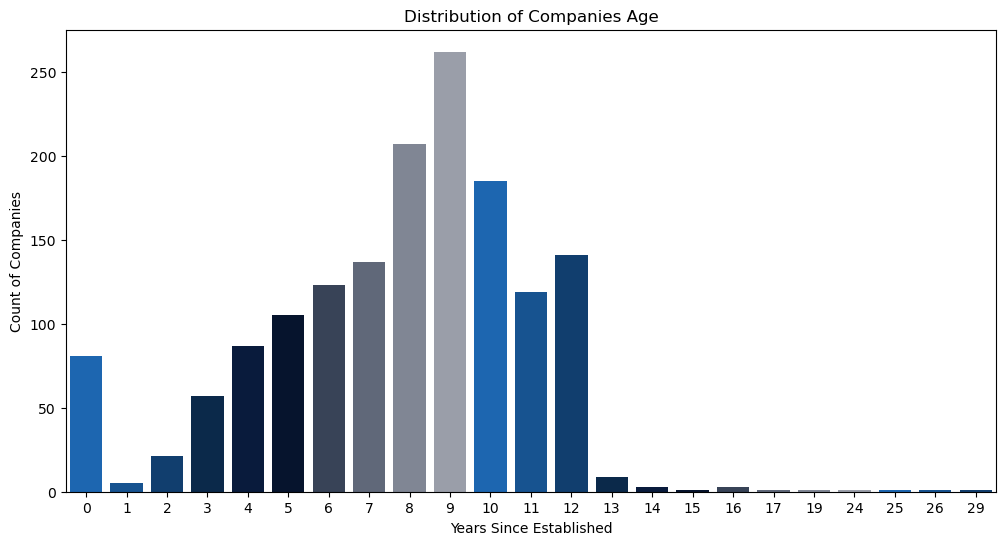

In [21]:
companies_age_stats = startup.groupby('companies_age').size().reset_index(name='count')
plt.figure(figsize=(12, 6))
sns.barplot(x='companies_age', y='count', data=companies_age_stats, palette=bbg_palette)
plt.title('Distribution of Companies Age')
plt.xlabel('Years Since Established')
plt.ylabel('Count of Companies')
plt.show()

#### 2.Industry with the Highest Number of Leading Startup Companies

In [22]:
# Industry Analysis:
# 72 different industries
industry_counts = startup['industry'].value_counts()
industry_counts

industry
Internet                    610
IT Services & Consulting    159
Software Product            103
EdTech                       91
Financial Services           74
                           ... 
Iron & Steel                  1
Banking                       1
Printing & Publishing         1
Metals & Mining               1
Chemicals                     1
Name: count, Length: 72, dtype: int64

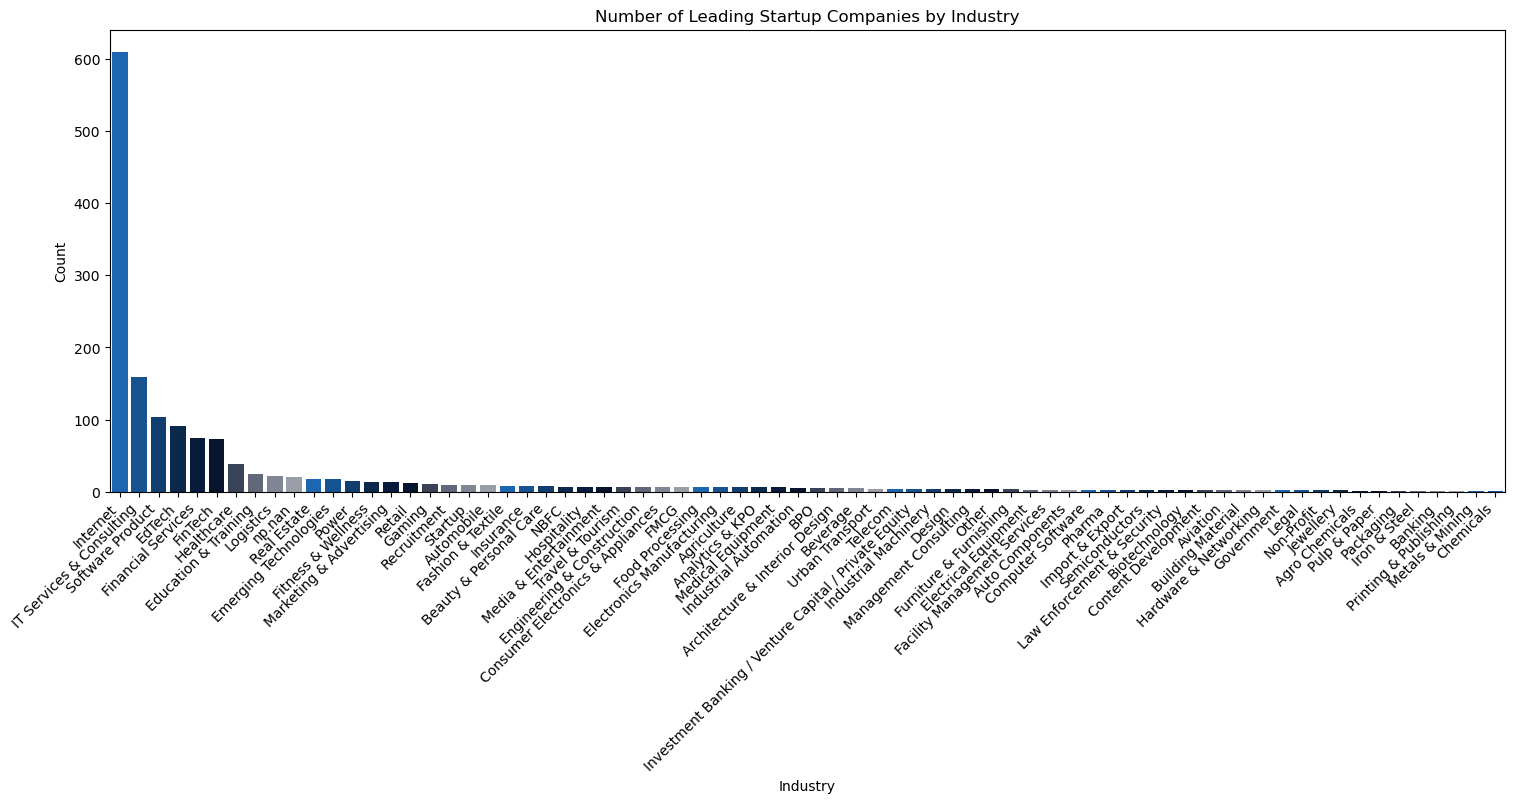

In [23]:
plt.figure(figsize=(18, 6))
sns.countplot(data=startup, x='industry', order=startup['industry'].value_counts().index, palette=bbg_palette)
plt.title('Number of Leading Startup Companies by Industry')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

1) The analysis reveals a diverse distribution of establishment years among leading startup companies, with a significant concentration around the 8 to 12-year mark, followed by a gradual decline in numbers as the age of the companies increases beyond this range. This suggests a dynamic ecosystem where a substantial number of startups thrive in their early years, while longevity beyond the decade mark becomes less common among the leading players.

2) 

#### 3.average company rating among the leading startup companies?

In [24]:
# Company Rating Analysis:
average_company_rating = startup['company_rating'].mean()
print(f"Average Company Rating is : {average_company_rating:.2f}")

Average Company Rating is : 3.75


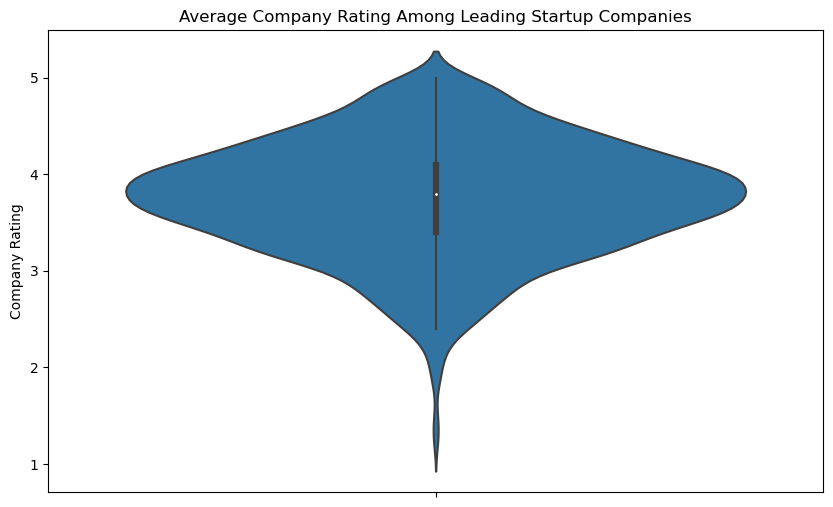

In [25]:
# violin 
plt.figure(figsize=(10, 6))
sns.violinplot(data=startup, y='company_rating')
plt.title('Average Company Rating Among Leading Startup Companies')
plt.ylabel('Company Rating')
plt.show()

#### 4.Number of Reviews Provided for top 10 Company

In [26]:
# Reviews Analysis:
top_reviewed_companies = startup.sort_values(by='reviews', ascending=False).head(10)
print("Top 10 Companies according to Reviews are :", top_reviewed_companies[['companies', 'reviews']])

Top 10 Companies according to Reviews are :          companies  reviews
0            Udaan   4800.0
2           Swiggy   3400.0
1        Oyo Rooms   3400.0
3           CARS24   2800.0
4      Whitehat jr   2800.0
5  CMS IT Services   2500.0
6       ElasticRun   2000.0
7        BlackBuck   2000.0
8         KFintech   1900.0
9       XpressBees   1800.0


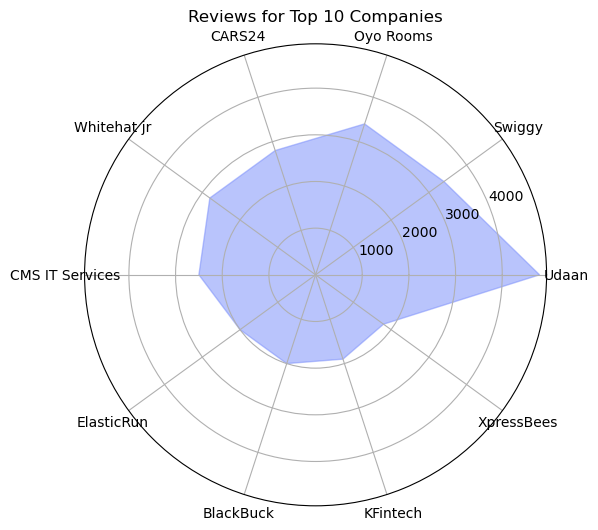

In [27]:
companies = top_reviewed_companies['companies']
reviews = top_reviewed_companies['reviews']
num_vars = len(companies)

# Creating a list of evenly spaced angles
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# spider plot
plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)
ax.fill(angles, reviews, color='#758AFB', alpha=0.5)

# labeling to each company
ax.set_thetagrids(np.array(angles) * 180 / np.pi, labels=companies)
plt.title('Reviews for Top 10 Companies')
plt.show()

#### 5. Number of Reviews Provided for least 10 Company

In [28]:
# Reviews Analysis:
least_reviewed_companies = startup.sort_values(by='reviews').head(10)
print("Least 10 Companies according to Reviews are :", least_reviewed_companies[['companies', 'reviews']])

Least 10 Companies according to Reviews are :                   companies  reviews
1599             TECHNOMECH     13.0
1588                Ziffity     13.0
1589                  Reach     13.0
1590                 Wwstay     13.0
1591         Health Impetus     13.0
1592     Analyttica Datalab     13.0
1598   Riverbank Developers     13.0
1594           TradingBells     13.0
1595           Welcome Cure     13.0
1596  Plancess EduSolutions     13.0


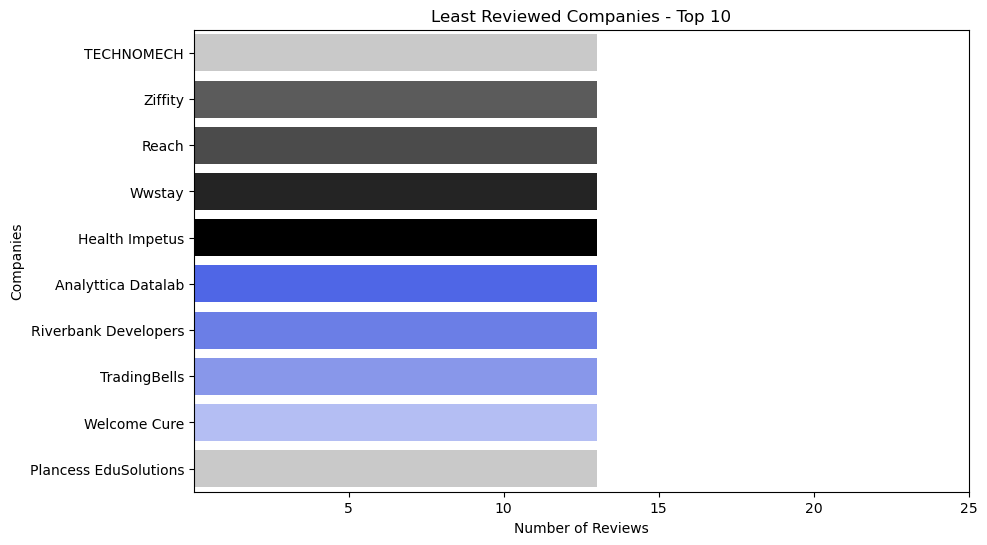

In [29]:
least_reviewed_companies = least_reviewed_companies.sort_values(by='reviews')
# horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='reviews', y='companies', data=least_reviewed_companies, palette = multi_palette)
plt.title('Least Reviewed Companies - Top 10')
plt.xlabel('Number of Reviews')
plt.ylabel('Companies')
new_ticks = [5, 10, 15, 20, 25] # to change the values of x
plt.xticks(new_ticks)
plt.show()

#### 6.number of interviews have been conducted for top 15 companies

In [30]:
# Interviews Analysis:
top_companies = startup.groupby('companies')['interviews'].sum().nlargest(15)
for company, interviews in top_companies.items():
    print(f"Company: {company}, Interviews: {interviews}")

Company: Country Holidays Travel India, Interviews: 404
Company: Udaan, Interviews: 288
Company: Whitehat jr, Interviews: 287
Company: Swiggy, Interviews: 272
Company: Planet Spark, Interviews: 256
Company: CARS24, Interviews: 216
Company: ElasticRun, Interviews: 212
Company: Meesho, Interviews: 174
Company: Oyo Rooms, Interviews: 165
Company: PhonePe, Interviews: 144
Company: Ola Electric Mobility, Interviews: 143
Company: NoBroker, Interviews: 139
Company: Unacademy, Interviews: 133
Company: BlackBuck, Interviews: 131
Company: upGrad, Interviews: 130


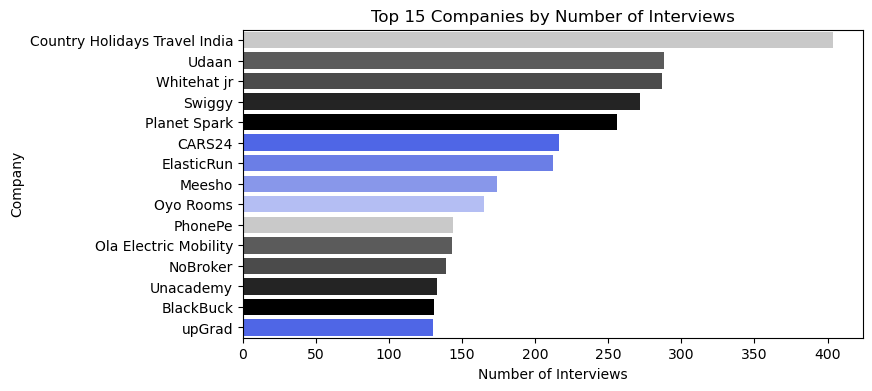

In [31]:
# top 15 companies based on interview counts
top_companies = startup.groupby('companies')['interviews'].sum().nlargest(15)
plt.figure(figsize=(8, 4))
sns.barplot(x=top_companies.values, y=top_companies.index, palette = multi_palette)
plt.title('Top 15 Companies by Number of Interviews')
plt.xlabel('Number of Interviews')
plt.ylabel('Company')
plt.show()

#### 7.total number of jobs available in 100 company

In [32]:
# Job Availability Analysis:
top_companies = startup.groupby('companies')['jobs'].sum().nlargest(100)
print("Top N Companies by Total Number of Jobs:", top_companies)

Top N Companies by Total Number of Jobs: companies
Talent500            880
CIEL HR              552
Whitehat jr          514
TIGI HR Solution     444
NoBroker             435
                    ... 
Skill Lync            76
MindTickle            75
Aye Finance           74
Navi Technologies     74
Embibe                72
Name: jobs, Length: 100, dtype: int32


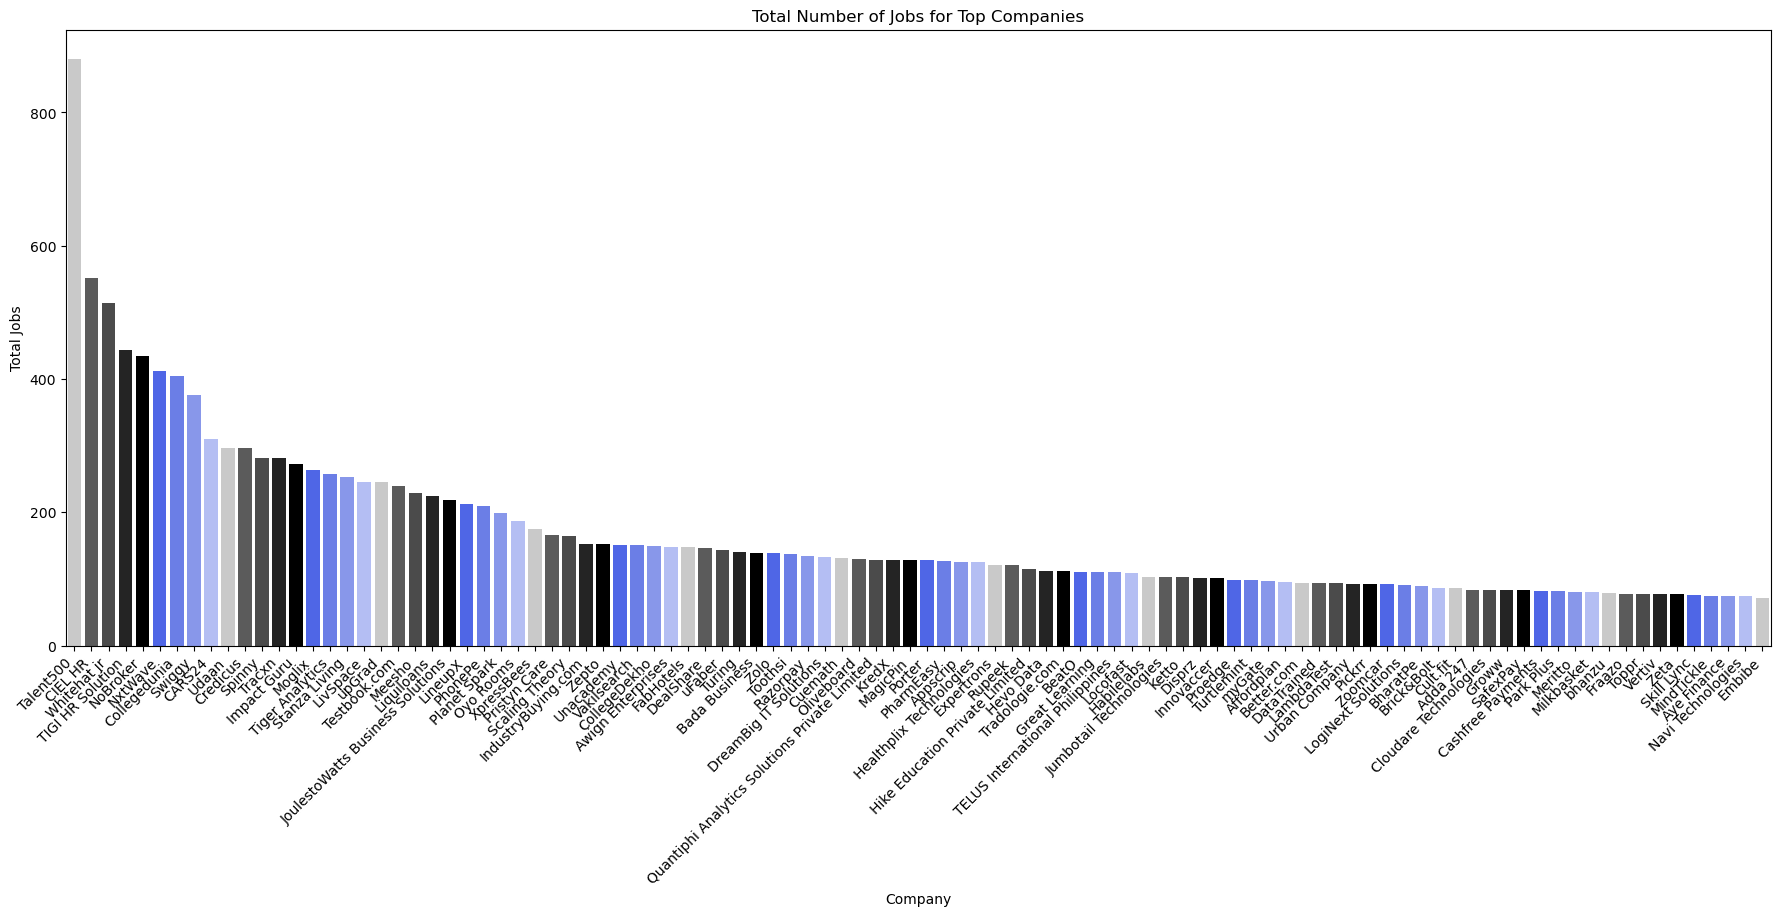

In [33]:
top_companies = startup.groupby('companies')['jobs'].sum().nlargest(100)
plt.figure(figsize=(22, 8))
sns.barplot(x=top_companies.index, y=top_companies.values, palette=multi_palette)
plt.title('Total Number of Jobs for Top Companies')
plt.xlabel('Company')
plt.ylabel('Total Jobs')
plt.xticks(rotation=45, ha='right')
plt.show()

#### 9.benefits are offered by top and least companies

In [34]:
# Benefits Analysis:
top_benefits = startup.sort_values(by='benefits', ascending=False).head(15) # apart from zero consider everything
least_benefits = startup.sort_values(by='benefits').head(15) # contains no-benifits
top_least_benefits = pd.concat([top_benefits, least_benefits])
benefit_pivot = top_least_benefits.pivot_table(values='benefits', index='companies', aggfunc='mean')

# using style property
custom_cmap = ListedColormap(multi_palette)
benefits_pivot = benefit_pivot.style.background_gradient(cmap=custom_cmap)

print("Pivot Table for top and least Benefits Analysis:")
benefits_pivot

Pivot Table for top and least Benefits Analysis:


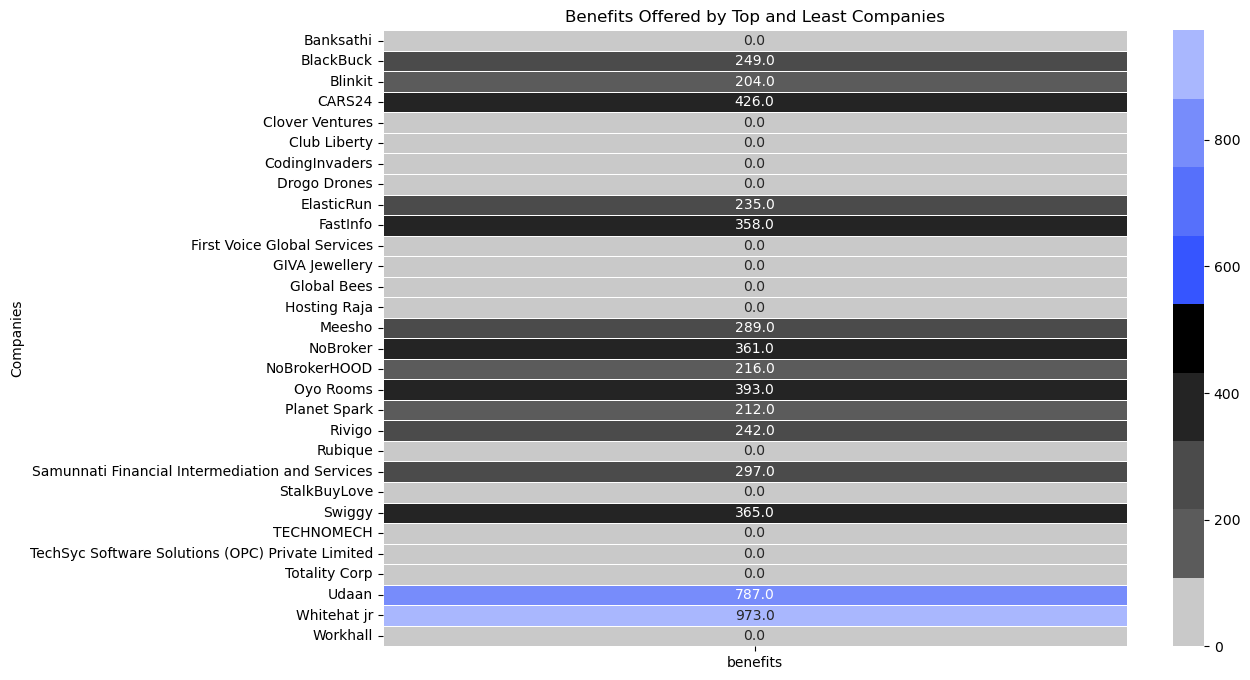

In [35]:
# Convert the Styler object back to a DataFrame
benefits_pivot_df = benefits_pivot.data
plt.figure(figsize=(12, 8))
sns.heatmap(benefits_pivot_df, cmap=custom_cmap, annot=True, fmt=".1f", linewidths=.5)
plt.title('Benefits Offered by Top and Least Companies')
plt.ylabel('Companies')
plt.show()

#### 10.How does the company rating vary across different industries

In [36]:
# Company Ratings Across Industries:
rating_by_industry = startup.groupby('industry')['company_rating'].mean()
rating_by_industry

industry
Agriculture                       3.950000
Agro Chemicals                    4.300000
Analytics & KPO                   3.666667
Architecture & Interior Design    3.600000
Auto Components                   3.800000
                                    ...   
Startup                           4.070000
Telecom                           4.475000
Travel & Tourism                  3.500000
Urban Transport                   3.950000
np.nan                            3.733333
Name: company_rating, Length: 72, dtype: float64

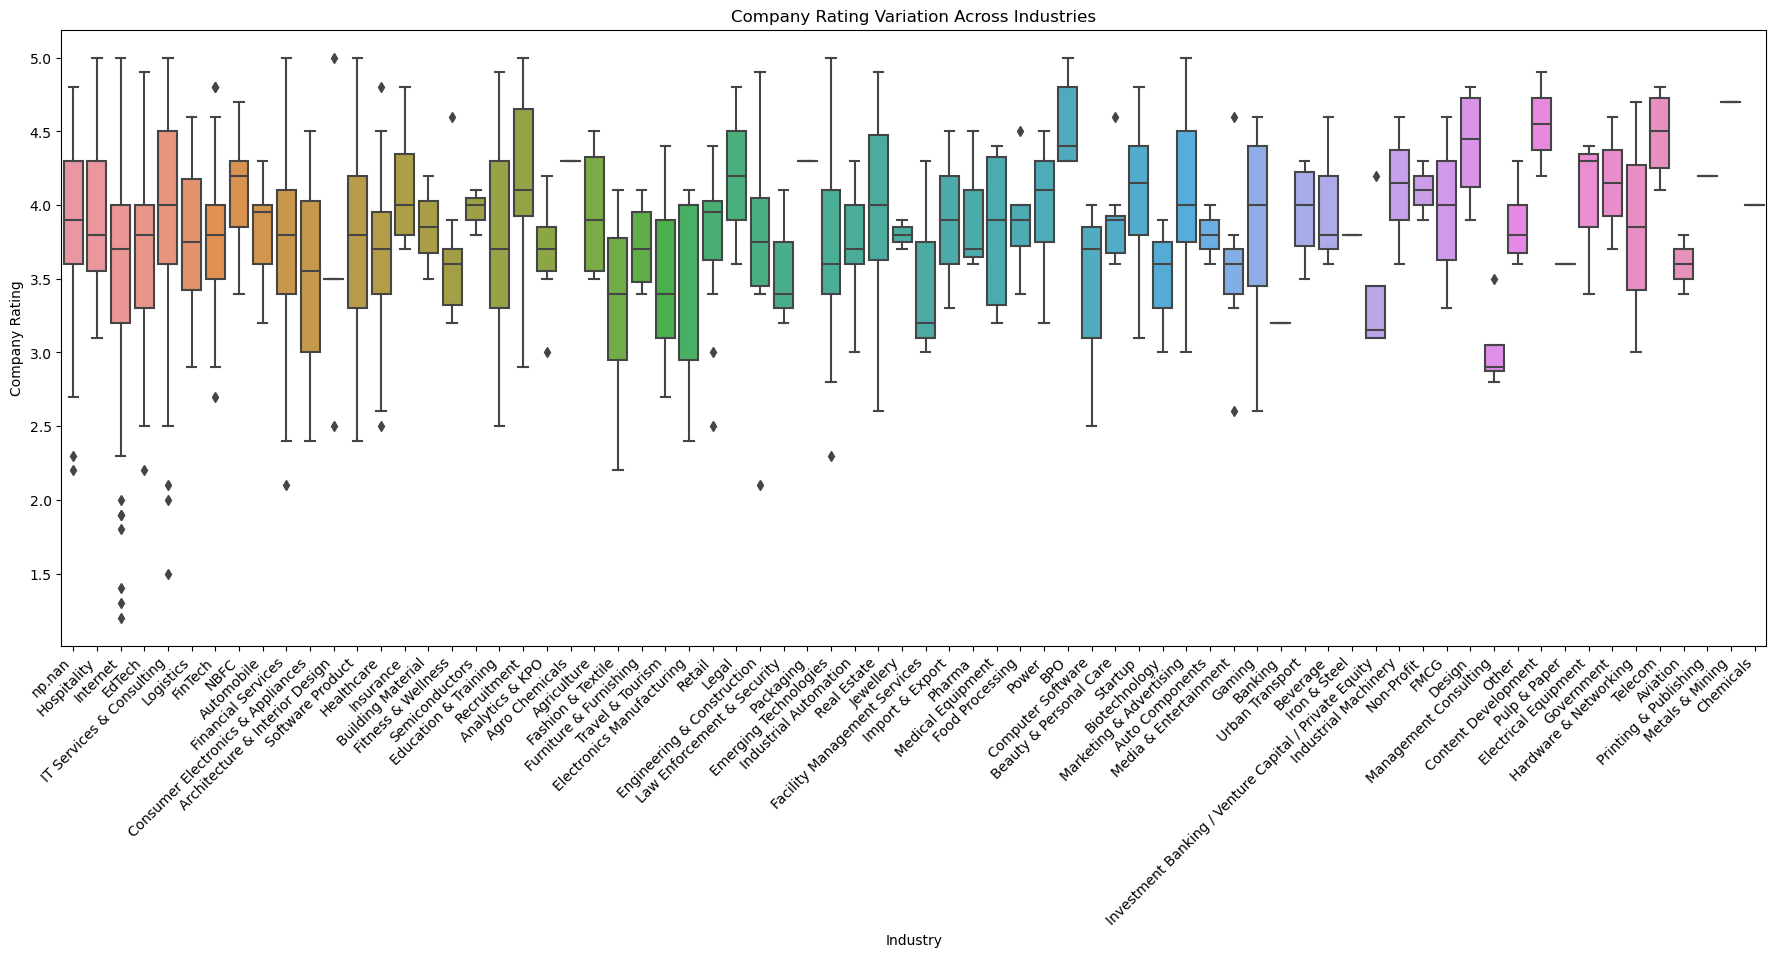

In [37]:
# boxplot
plt.figure(figsize=(22, 8))
sns.boxplot(data=startup, x='industry', y='company_rating')
plt.title('Company Rating Variation Across Industries')
plt.xlabel('Industry')
plt.ylabel('Company Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

### bi-variate analysis

#### 11.How do the company ratings vary across different industries and startup types

In [38]:
# adding top_industries column
top_industries = startup['industry'].value_counts().head(20).index
startup['top_industries'] = startup['industry'].apply(lambda x: x if x in top_industries else 'Other')
top_industries

Index(['Internet', 'IT Services & Consulting', 'Software Product', 'EdTech',
       'Financial Services', 'FinTech', 'Healthcare', 'Education & Training',
       'Logistics', 'np.nan', 'Real Estate', 'Emerging Technologies', 'Power',
       'Fitness & Wellness', 'Marketing & Advertising', 'Retail', 'Gaming',
       'Recruitment', 'Startup', 'Automobile'],
      dtype='object', name='industry')

In [39]:
# pivot table
industry_startup_type_pivot = pd.pivot_table(startup, values='company_rating', index='top_industries', columns='startup_type', aggfunc=lambda x: round(x.mean(), 2))
industry_startup_type_pivot

startup_type              Forbes Global 2000   Fortune India 500   \
top_industries                                                      
Automobile                                NaN                 NaN   
EdTech                                    NaN                 NaN   
Education & Training                      NaN                 NaN   
Emerging Technologies                     NaN                 NaN   
FinTech                                   NaN                 NaN   
Financial Services                        NaN                 NaN   
Fitness & Wellness                        NaN                 NaN   
Gaming                                    NaN                 NaN   
Healthcare                                NaN                 NaN   
IT Services & Consulting                 3.30                 NaN   
Internet                                  NaN                 NaN   
Logistics                                 NaN                 NaN   
Marketing & Advertising                   NaN                 NaN   
Other                                    4.03                 4.0   
Power                                     NaN                 NaN   
Real Estate                               NaN                 NaN   
Recruitment                               NaN                 NaN   
Retail                                    NaN                 NaN   
Software Product                          NaN                 NaN   
Startup                                   NaN                 NaN   
np.nan                                    NaN                 NaN   

startup_type              Indian Unicorn   Public   Startup   \
top_industries                                                 
Automobile                           3.30      NaN      3.94   
EdTech                               3.50      NaN      3.80   
Education & Training                  NaN      NaN      3.79   
Emerging Technologies                3.55      NaN      3.74   
FinTech                              3.80     4.05      3.78   
Financial Services                   3.68     4.05      3.81   
Fitness & Wellness                   3.80      NaN      3.60   
Gaming                               3.40      NaN      3.96   
Healthcare                           3.60      NaN      3.68   
IT Services & Consulting             3.70     4.00      4.00   
Internet                             3.64     3.93      3.65   
Logistics                            3.60     3.60      3.88   
Marketing & Advertising               NaN      NaN      4.11   
Other                                3.70     3.88      3.83   
Power                                 NaN     4.10      4.01   
Real Estate                           NaN      NaN      3.80   
Recruitment                          3.30      NaN      4.43   
Retail                                NaN      NaN      3.86   
Software Product                     3.35     4.10      3.75   
Startup                               NaN      NaN       NaN   
np.nan                               4.00      NaN      3.62   

startup_type              Startup | 4 years old   not available  
top_industries                                                   
Automobile                                   NaN           3.20  
EdTech                                       NaN           3.43  
Education & Training                         NaN           3.83  
Emerging Technologies                        NaN           4.10  
FinTech                                      NaN           3.58  
Financial Services                           NaN           3.54  
Fitness & Wellness                           NaN           3.45  
Gaming                                       NaN           3.50  
Healthcare                                   NaN           3.43  
IT Services & Consulting                     4.6           3.92  
Internet                                     NaN           3.56  
Logistics                                    NaN           3.25  
Marketing & Adv

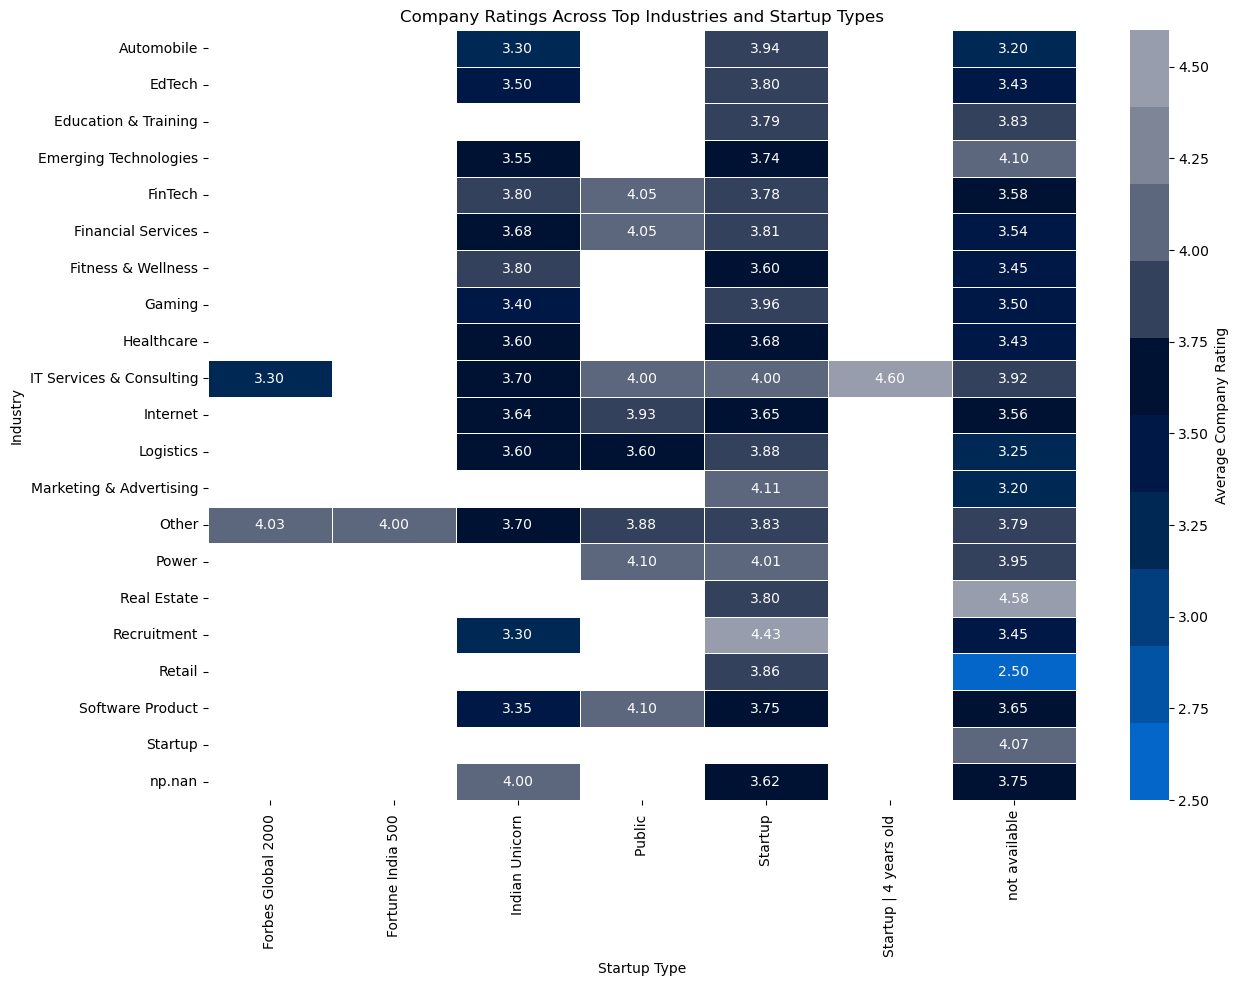

In [40]:
industry_startup_type_pivot = pd.pivot_table(startup, values='company_rating', index='top_industries', columns='startup_type', aggfunc='mean')
plt.figure(figsize=(14, 10))
sns.heatmap(industry_startup_type_pivot, cmap=bbg_palette, annot=True, fmt=".2f", linewidths=.5, cbar_kws={'label': 'Average Company Rating'})
plt.title('Company Ratings Across Top Industries and Startup Types')
plt.xlabel('Startup Type')
plt.ylabel('Industry')
plt.show()

* Forbes Global 2000 is an annual ranking of the world's biggest public companies along 4 major verticals: sales, profits, assets, market value.
* The Fortune India 500 is a ranking of the top 500 corporations in India compiled on the basis of latest sales and gross revenue figures. The list is published annually by Fortune magazine.
* A unicorn startup is a term used to describe a privately held startup company with a valuation of over 1 billion dollor in india. 
* some public startups go public to create a liquid market for their shares
* startup company in the first stages of operations.

#### 12.Do the benefits offered vary significantly across different startup types and company locations?

In [41]:
# benifits across different startup types and company locations
# startup_type_benefits_cross = pd.crosstab(startup['startup_type'], startup['benefits'], margins=True, margins_name='Total')
# startup_type_benefits_cross

startup['benefits_bins'] = pd.cut(startup['benefits'], bins=range(0, int(startup['benefits'].max())+100, 100), right=False)
startup_type_benefits_cross = pd.crosstab(startup['startup_type'], startup['benefits_bins'], margins=True, margins_name='Total')
print("Startup Type vs Benefits Cross-Tabulation:")
print(startup_type_benefits_cross)

Startup Type vs Benefits Cross-Tabulation:
benefits_bins           [0, 100)  [100, 200)  [200, 300)  [300, 400)  \
startup_type                                                           
Forbes Global 2000             4           0           0           0   
Fortune India 500              0           1           0           0   
Indian Unicorn                40           8           5           3   
Public                        15           2           0           0   
Startup                     1178           9           2           1   
Startup | 4 years old          1           0           0           0   
not available                279           0           1           0   
Total                       1517          20           8           4   

benefits_bins           [400, 500)  [700, 800)  [900, 1000)  Total  
startup_type                                                        
Forbes Global 2000               0           0            0      4  
Fortune India 500            

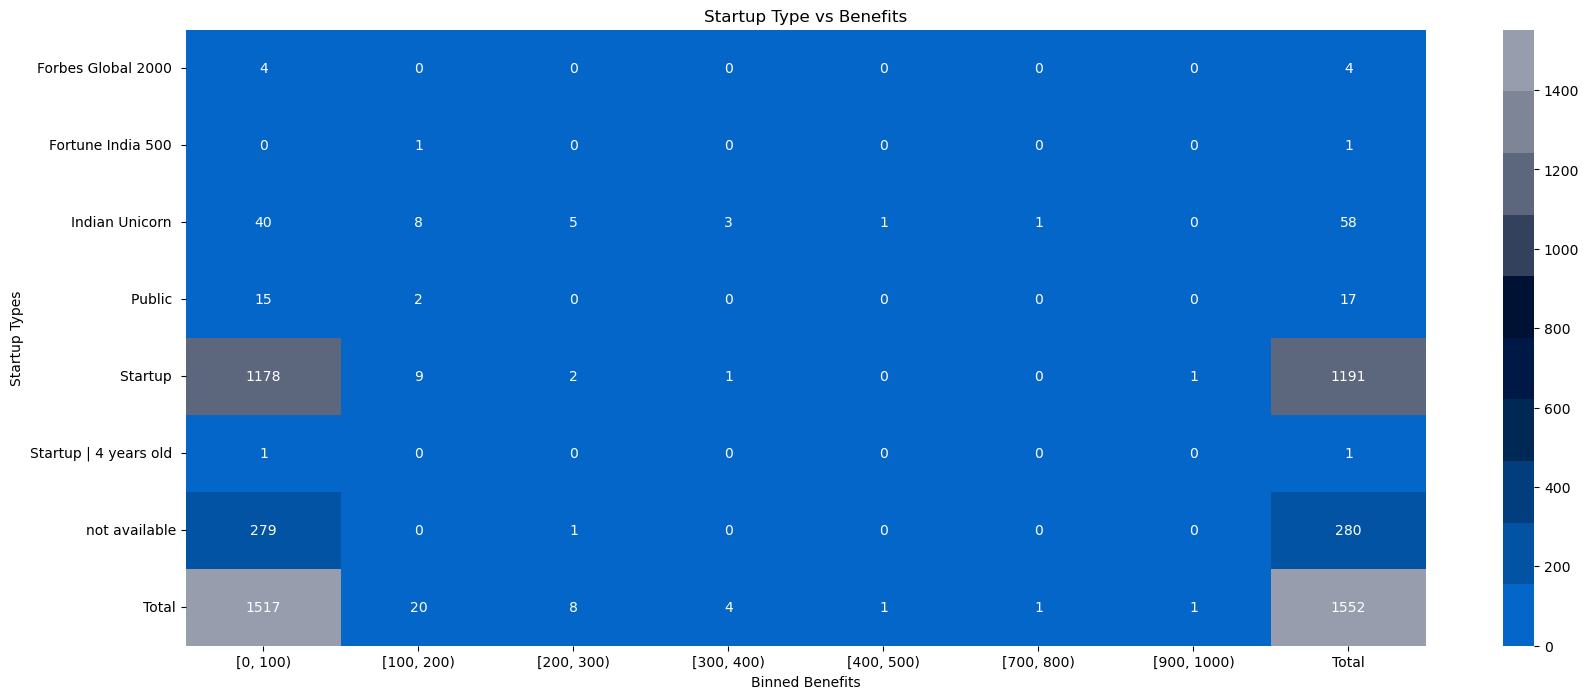

In [42]:
plt.figure(figsize=(20, 8))
sns.heatmap(startup_type_benefits_cross, annot=True, cmap=bbg_palette, fmt='g', cbar=True)
plt.title("Startup Type vs Benefits")
plt.xlabel("Binned Benefits")
plt.ylabel('Startup Types')
plt.show()

#### 13.Are there outliers in the company ratings based on the companies age?

In [43]:
# analysis of Outliers in Company Ratings:
# Calculate z-scores for company ratings within each establishment year
startup['rating_zscore'] = startup.groupby('companies_age')['company_rating'].transform(lambda x: (x - x.mean()) / x.std())

# outliers based on z-scores (considering z-score beyond a threshold as outliers)
outliers = startup[abs(startup['rating_zscore']) > 3]

# Outliers in Company Ratings based on Establishment Year
outliers[['companies','companies_age', 'company_rating']]

companies  companies_age  company_rating
949                   Bravvura              9             1.4
992                   LimeTray             11             1.5
1102                Truelancer             10             1.9
1104  Ixora Corporate Services              8             1.3
1485                  Lawyered              9             1.9
1505                  Paninian              6             1.2
1527                  MindHour             10             1.8

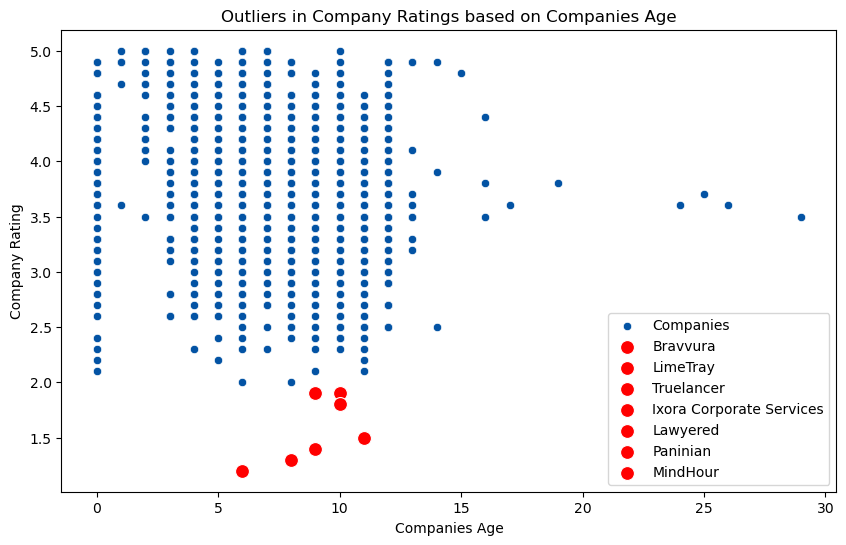

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='companies_age', y='company_rating', data=startup, color = '#0353A4', label='Companies')

# Plotting outliers and adding company names as legend entries
for _, row in outliers.iterrows():
    sns.scatterplot(x='companies_age', y='company_rating', data=outliers[outliers['companies'] == row['companies']],
                    color='red', label=row['companies'], legend='brief', s=100)

plt.title('Outliers in Company Ratings based on Companies Age')
plt.xlabel('Companies Age')
plt.ylabel('Company Rating')
plt.legend()
plt.show()

#### 14.Do different industries have varying numbers of interviews conducted?

In [45]:
# Interviews Across Industries: 
interviews_by_industry_stats = startup.groupby('industry')['interviews'].describe()
interviews_by_industry_stats

count       mean         std   min    25%  \
industry                                                                    
Agriculture                       6.0  10.500000   15.984367   2.0   3.25   
Agro Chemicals                    1.0  17.000000         NaN  17.0  17.00   
Analytics & KPO                   6.0  28.166667   40.941014   0.0   2.50   
Architecture & Interior Design    5.0  32.000000   38.606994   3.0   4.00   
Auto Components                   3.0   6.333333    4.041452   2.0   4.50   
...                               ...        ...         ...   ...    ...   
Startup                          10.0   1.700000    2.451757   0.0   0.00   
Telecom                           4.0   0.500000    0.577350   0.0   0.00   
Travel & Tourism                  7.0  64.285714  149.955231   1.0   3.00   
Urban Transport                   4.0   4.250000    3.774917   0.0   2.25   
np.nan                           21.0  15.619048   62.438351   0.0   1.00   

                                 50%    75%    max  
industry                                            
Agriculture                      4.5   5.75   43.0  
Agro Chemicals                  17.0  17.00   17.0  
Analytics & KPO                  8.0  39.00  103.0  
Architecture & Interior Design   8.0  57.00   88.0  
Auto Components                  7.0   8.50   10.0  
...                              ...    ...    ...  
Startup                          1.0   2.00    8.0  
Telecom                          0.5   1.00    1.0  
Travel & Tourism                 8.0  15.50  404.0  
Urban Transport                  4.0   6.00    9.0  
np.nan                           1.0   4.00  288.0  

[72 rows x 8 columns]

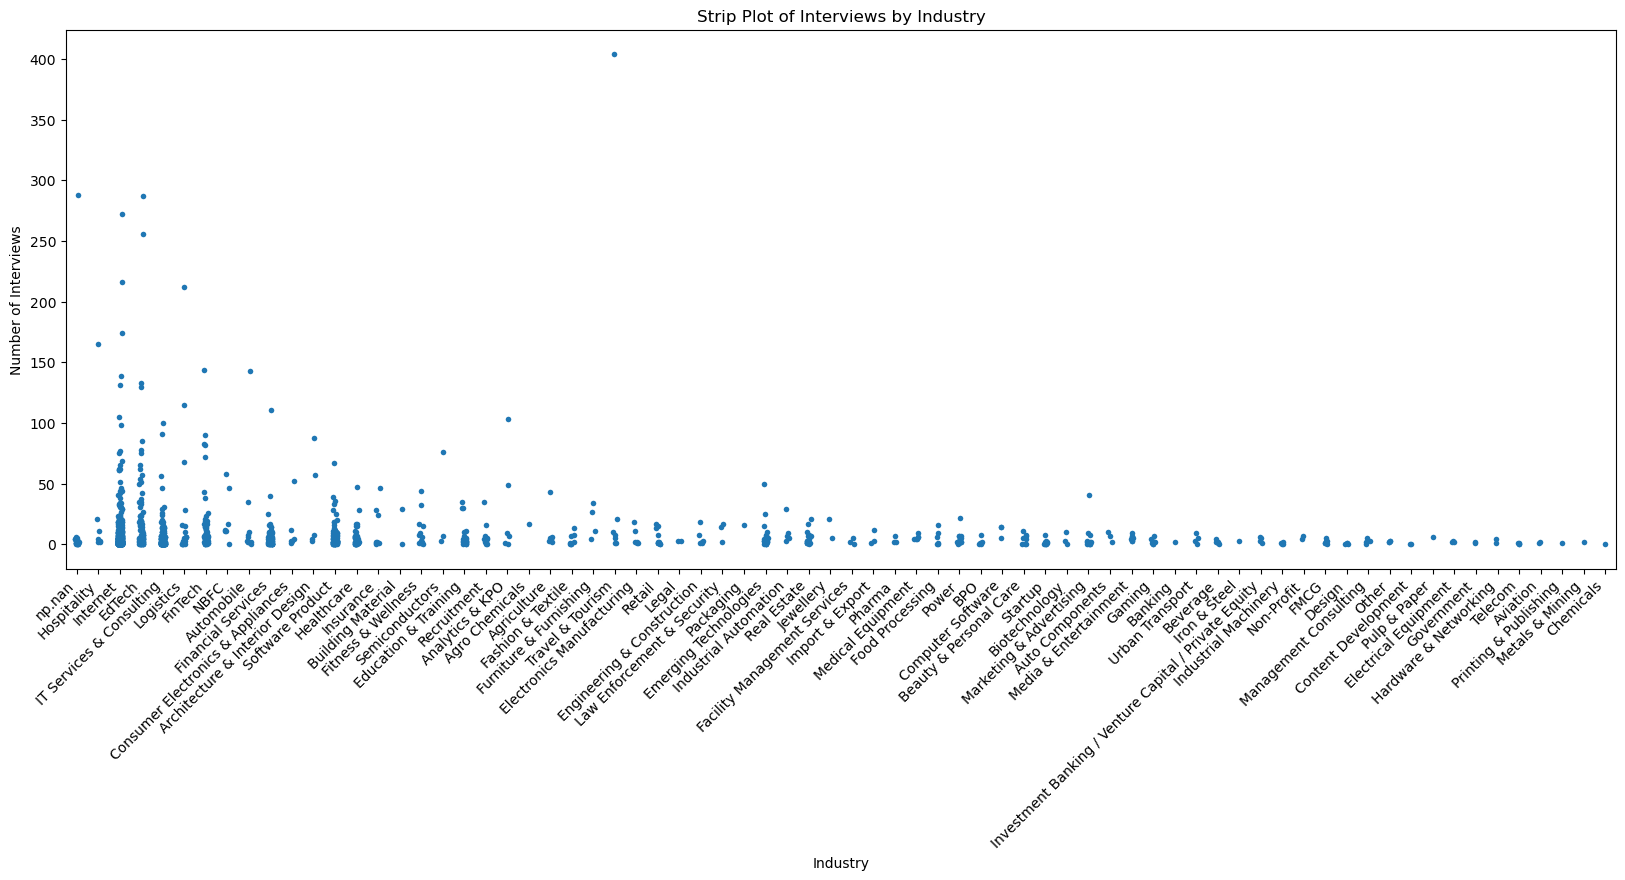

In [46]:
plt.figure(figsize=(20,7))
sns.stripplot(x='industry', y='interviews', data=startup, size=4, jitter=True)
plt.title('Strip Plot of Interviews by Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Interviews')
plt.xticks(rotation=45, ha='right')
plt.show()

A strip plot is a type of categorical scatter plot that displays individual data points along a single axis. It is particularly useful for visualizing the distribution of a numerical variable across different categories. Here's how the strip plot works:

- Categories on X-axis: In your case, the 'industry' variable is represented on the X-axis. Each unique category in the 'industry' column will have its own strip of data points.

- Data points on Y-axis: The 'interviews' variable, which is the numerical variable you want to visualize, is represented on the Y-axis. Each data point represents an observation or entry in your dataset.

- Vertical Distribution: For each category (industry), the strip plot positions individual data points vertically along the Y-axis. If there are multiple data points with the same 'interviews' value, the strip plot may jitter them slightly to avoid overlapping points.

- Marker Size and Jitter: The size parameter controls the size of the markers representing data points. Larger markers may be more visible but can also lead to more overlap. The jitter=True introduces a small amount of random noise to the horizontal position of each point, helping to spread out overlapping points.

- Interpretation: By observing the distribution of points within each category, you can get insights into how the 'interviews' variable varies across different industries.

### multi-variate analysis
#### 15.What is the relationship between the companies age, company rating, and number of reviews?

In [47]:
# Relationship Between Establishment Year, Rating, and Reviews:
data_subset = startup[['companies_age', 'company_rating', 'reviews']]
correlation_matrix = data_subset.corr()
print("Correlation Matrix:", correlation_matrix)

summary_stats = data_subset.describe()
print("\nSummary Statistics:", summary_stats)

Correlation Matrix:                 companies_age  company_rating   reviews
companies_age        1.000000       -0.121011  0.101689
company_rating      -0.121011        1.000000 -0.017771
reviews              0.101689       -0.017771  1.000000

Summary Statistics:        companies_age  company_rating      reviews
count    1552.000000     1552.000000  1552.000000
mean        7.741624        3.747487   114.868557
std         3.299707        0.595107   290.019908
min         0.000000        1.200000    13.000000
25%         6.000000        3.400000    22.000000
50%         8.000000        3.800000    39.000000
75%        10.000000        4.100000    85.000000
max        29.000000        5.000000  4800.000000


In [48]:
correlation_matrix

companies_age  company_rating   reviews
companies_age        1.000000       -0.121011  0.101689
company_rating      -0.121011        1.000000 -0.017771
reviews              0.101689       -0.017771  1.000000

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\sathw\AppData\Local\Temp\ipykernel_14420\3017612779.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


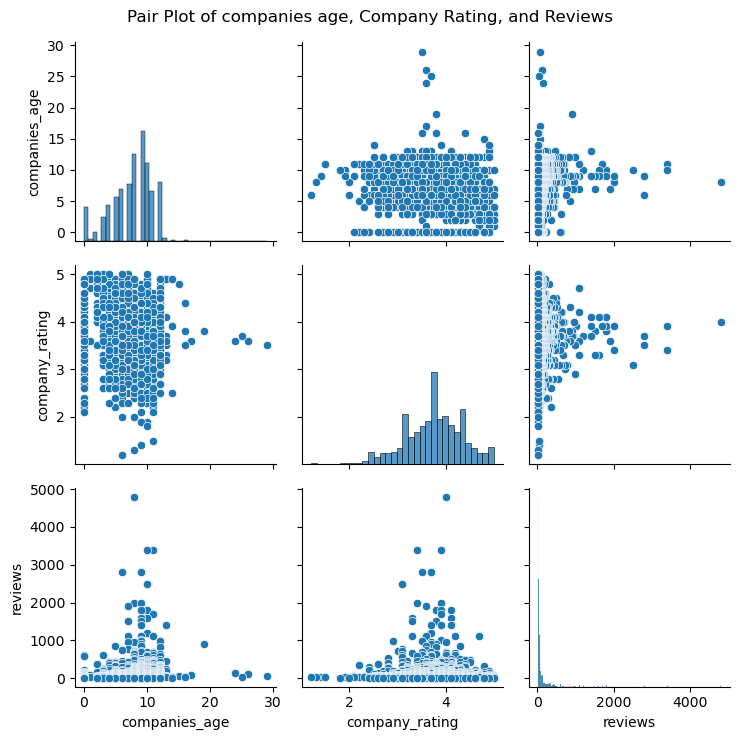

In [49]:
sns.pairplot(data_subset)
plt.suptitle('Pair Plot of companies age, Company Rating, and Reviews')
plt.tight_layout()
plt.show()

#### 16.Are there differences in the distribution of salaries reported based on industry and company main locations?

In [50]:
# Distribution of Salaries Based on Industry and Company Locations:
salary_stats = startup.groupby(['industry', 'main_locations'])['salaries'].describe()
salary_stats

count         mean         std     min  \
industry    main_locations                                                
Agriculture Alwar                  1.0   186.000000         NaN   186.0   
            Bangalore              1.0   171.000000         NaN   171.0   
            Gurgaon/Gurugram       1.0   444.000000         NaN   444.0   
            Indore                 1.0   445.000000         NaN   445.0   
            Patna                  1.0  1100.000000         NaN  1100.0   
...                                ...          ...         ...     ...   
np.nan      Bengaluru/Bangalore    2.0   212.500000  251.022907    35.0   
            Chennai                1.0   260.000000         NaN   260.0   
            Mumbai                 1.0   246.000000         NaN   246.0   
            hyderābād              1.0   236.000000         NaN   236.0   
            not available         15.0   150.666667  119.531028    38.0   

                                     25%     50%      75%     max  
industry    main_locations                                         
Agriculture Alwar                 186.00   186.0   186.00   186.0  
            Bangalore             171.00   171.0   171.00   171.0  
            Gurgaon/Gurugram      444.00   444.0   444.00   444.0  
            Indore                445.00   445.0   445.00   445.0  
            Patna                1100.00  1100.0  1100.00  1100.0  
...                                  ...     ...      ...     ...  
np.nan      Bengaluru/Bangalore   123.75   212.5   301.25   390.0  
            Chennai               260.00   260.0   260.00   260.0  
            Mumbai                246.00   246.0   246.00   246.0  
            hyderābād             236.00   236.0   236.00   236.0  
            not available          70.00   132.0   168.50   437.0  

[543 rows x 8 columns]

In [51]:
fig = px.scatter_3d(startup, x='industry', y='main_locations', z='salaries', color='salaries', size='salaries')
fig.update_layout(scene=dict(xaxis_title='Industry', yaxis_title='Company Locations', zaxis_title='Salaries'))
fig.write_html('scatter_3d.html')
fig.show()

* There is a wide range of salaries across different locations and industries.

* The highest salaries (indicated by yellow and orange points) are concentrated in a few locations and industries.

* Most of the data points (which represent individual salaries) are in the lower salary range (purple points), suggesting that lower salaries are more common in the dataset.

* Some industries, like Financial Services and Startups, appear to have a wider range of salaries compared to others.

#### 17.Do specific companies, industries and company locations have highest salaries?

In [73]:
max_salaries_benefits = startup.groupby(['companies', 'industry', 'main_locations'])[['salaries']].max().reset_index()
max_salaries_benefits

companies              industry main_locations  salaries
0     1 India Family Mart                Retail        Gurgaon    1200.0
1                 10times              Internet  not available     188.0
2                 1Bridge              Internet  not available     100.0
3        1ne Click Online              Internet        Gurgaon     127.0
4         2050 Healthcare            Healthcare    Bhubaneswar     151.0
...                   ...                   ...            ...       ...
1547           sysotel.ai      Software Product       Rourkela      14.0
1548          thinkbridge      Software Product         Austin     490.0
1549               uFaber  Education & Training         Mumbai    1300.0
1550               upGrad                EdTech  San Francisco    6800.0
1551            yellow.ai      Software Product      San Mateo    1000.0

[1552 rows x 4 columns]

In [74]:
fig = px.sunburst(max_salaries_benefits, path=['industry', 'main_locations', 'companies'], values='salaries',
                  title='Maximum Salaries Across Companies, Industries, and Main Locations')
fig.write_html('sunburst_plot.html')
fig.show()

#### 18.Is there a significant relationship between the company rating, number of salaries reported, and the number of benefits offered? 

In [54]:
correlation_matrix = startup[['company_rating', 'salaries', 'benefits']].corr()
correlation_matrix

company_rating  salaries  benefits
company_rating        1.000000 -0.063131  0.004689
salaries             -0.063131  1.000000  0.775563
benefits              0.004689  0.775563  1.000000

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



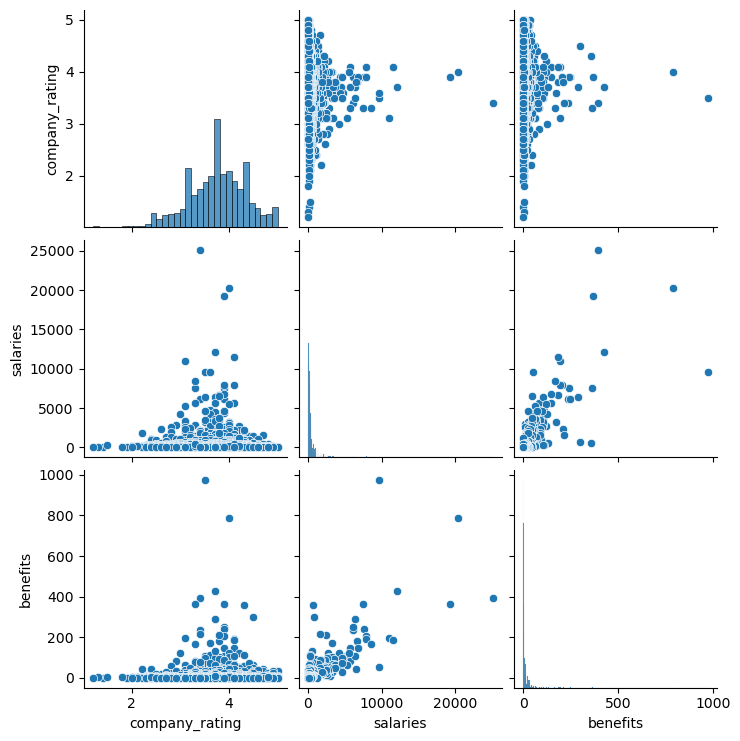

In [55]:
sns.pairplot(startup[['company_rating', 'salaries', 'benefits']])
plt.show()

- .corr(): This method calculates the pairwise correlation coefficients between the selected columns. The result is a correlation matrix where each entry represents the correlation between two variables.

* The correlation coefficient ranges from -1 to 1, where:
* 1 indicates a perfect positive correlation,
* -1 indicates a perfect negative correlation, and
* 0 indicates no correlation.